In [1]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
# 기본 라이브러리들을 import함

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 한글 출력시 오류가 나서 이 부분을 추가

In [3]:
from preamble import *
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

# 기본 라이브러리들을 import

In [6]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas version", pd.__version__)

import matplotlib
print("matplotlib version", matplotlib.__version__)

import numpy as np
print("Numpy version", np.__version__)

import scipy as sp
print("Scipy version", sp.__version__)

import IPython
print("IPython version", IPython.__version__)

import sklearn
print("scikit-learn version", sklearn.__version__)

# 버전들을 살펴볼 때 필요한 함수들
# 대체로 __version__이라는 함수지만 sys에서는 그냥 version만을 사용

Python 버전: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version 1.1.3
matplotlib version 3.3.2
Numpy version 1.19.2
Scipy version 1.5.2
IPython version 7.19.0
scikit-learn version 0.23.2


In [7]:
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

display(data.head())

# csv 파일을 읽어서 앞에서 5개만 살펴봄
# 강의에서 본 것과 같은 표가 나옴
# 현장에서 모은 자료들은 의미가 같지만 다르게 표기가 되거나 할 수 있음
# 그래서 데이터를 확인을 해야 함 - 다음 쉘

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [9]:
print(data.gender.value_counts())

# 데이터를 확인하기 위해서 값들의 개수를 보여줌
# 예를 들어 male이 아닌 man이라고 표기가 되어있을 수 있으므로 이런 것을 확인
# 여기서는 male, female로 2개로 잘 되어있음

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [10]:
print("원본 특성 : \n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 사용 후 특성 : \n", list(data_dummies.columns))

# pd.get.dummies도 있음
# 특성들이 값에 따라 분할이 됨
# 예를 들어 gender는 'gender_ Female', 'gender_ Male'로 나뉨

원본 특성 : 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 사용 후 특성 : 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupa

In [11]:
display(data_dummies.head())

# 특성들이 분할 된 것을 볼 수 있음

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [12]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

# numpy 배열을 추출을 함(income_>50K를 추출)
# X, y의 모양을 출력

X.shape: (32561, 44)  y.shape: (32561,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

# 위의 데이터에 대해서 로지스틱 회귀 적용
# 훈련, 테스트 데이터로 나눔
# 점수가 0.81로 높음
# 데이터를 훈련/테스트로 나누기 전 전체 데이터에 대해 dummy를 적용해야 함


테스트 점수: 0.81


In [14]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
    '범주형 특성': ['양말', '여우', '양말', '상자']})

display(demo_df)

# 숫자로 표현된 범주형 특성
# 즉, 0, 1이 아니라 0~5까지의 숫자로 되어 있는 경우
# 이것을 바꿀려면 다른 방법을 해야 함


,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [15]:
display(pd.get_dummies(demo_df))

# 그냥 하게 되면 문자열 특성만 인코딩이 됨
# 아래와 같이 출력이 됨
# 즉, 숫자 특성이 그대로 남게됨

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [16]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

# 위의 문제를 해결하려면 숫자 특성을 str로 바꿔서 적용을 해야함
# 그러면 아래와 같이 숫자 특성이 나뉨

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [17]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

# OneHotEncoder을 사용하는 방법
# 원래는 index로 표현해주지만 OneHotEncoder은 인덱스로 표현할 수 있고, 배열로도 표현 가능
# 더미는 문자열만 바꿔줬지만 OneHotEncoder은 모든 특성이 범주형이라고 가정하고 변환

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

# 오류가 발생하지 않았음
# 부분적으로 범주형을 정해주는 ColumnTransformer를 사용
# 이름을 먼저 정해주고, StandardScaler를 사용, 특성들을 바꿔줌
# 즉, StandardScaler와 OneGotEncoder 두 개를 사용

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

# income을 제외한 모든 열을 추출함
# 데이터 프레임과 income을 train, test로 분할
# 그 다음 앞에서 만든 ColumnTransformer 모델로 훈련하고 훈련 데이터를 변환
# 변환된 데이터의 모습을 출력

(24420, 44)


In [26]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

# 로지스틱 회귀 모델로 변환된 데이터로 훈련
# 변환된 테스트 데이터로 테스트 점수를 출력
# 테스트 점수가 0.81로 높게 나옴

# 아래에서 오류가 발생했는데, max_iter를 증가시키면 해결되는 문제라고 생각을 함
# 그래서 아래와 같이 200으로 증가를 시켜서 실행을 함

테스트 점수: 0.81


C:\Users\white\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

# max_iter를 증가시켜서 실행을 했더니 오류가 발생하지 않음
# 그리고 테스트 점수도 0.81로 동일함

테스트 점수: 0.81


In [31]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

# 이번엔 make_column_transformer를 사용
# 앞에서 사용한 ColumnTransformer와 유사함
# 하지만 ColumnTransformer는 이름을 지정해주지만 이것은 지정해주지 않음

score: 0.63
score: 0.99


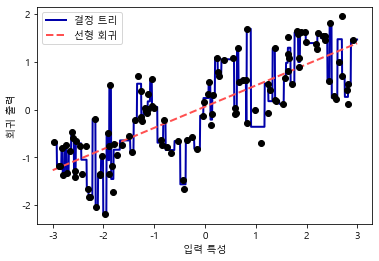

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, dreg.predict(line), label="결정 트리")

lreg = LinearRegression().fit(X, y)
plt.plot(line, lreg.predict(line), '--', label="선형 회귀")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
print("score: {:.2f}".format(lreg.score(X, y)))
print("score: {:.2f}".format(dreg.score(X, y)))

# 구간분할
# 샘플 120개가 -3~3 사이에 위치함
# 이것을 구간을 나눔
# 선형회귀와 결정트리회귀를 그림
# 빨간색이 선형 회귀, 파란 선이 결정트리회귀
# 결정트리 회귀가 높게 나옴
# 선형 회귀는 선 하나로 하므로 오차가 큼
# 하지만 결정 트리는 특성과 샘플을 모두 세세하게 보므로 스코어가 큼

# 결정트리 회귀가 강의보다 score가 더 높게 나옴
# 이것은 알고리즘이 개선이 되어서 점수가 높아진 것이라 추측이 됨

In [41]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
print(X[:10])
np.array(X_binned)[:10]

# 연속형 데이터를 구간 데이터로 변경
# 연속형 특성 하나를 구간을 나누어 범주형 특성으로 변환
# 원본 특성과 one hot encoding된 데이터를 확인할 수 있음

# 강의에서 사용된 toarray 함수가 오류가 발생해서 np.array로 바꿈
# 출력이 잘 되어서 나타났음

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Linear Regression score: 0.72
Decision TreeRegressor score: 0.72


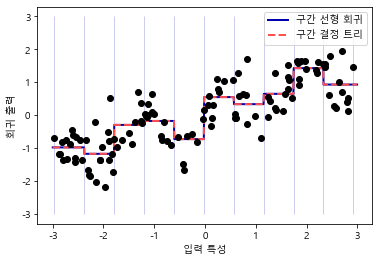

In [44]:
line_binned = kb.transform(line)

lreg = LinearRegression().fit(X_binned, y)
plt.plot(line, lreg.predict(line_binned), label='구간 선형 회귀')

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dreg.predict(line_binned), '--', label='구간 결정 트리')

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

print("Linear Regression score: {:.2f}".format(lreg.score(X_binned, y)))
print("Decision TreeRegressor score: {:.2f}".format(dreg.score(X_binned, y)))

# 점이 10개의 특성 중에 하나이므로 구간 선형 회귀와 구간 결정 트리가 일치함
# 스코어도 둘 다 같음
# 구간으로 변환하여 원핫인코딩후 구간별 예측 값이 상수값이 됨
# 결정트리는 특성별로 가장 좋은 구간을 학습하므로 구간 나누기가 별 도움이 되지 않음
# 일부 특성과 출력이 비선형이면서 용량이 크고 고차원의 데이터의 선형모델에 구축시 구간나누기가 유용함

In [45]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

# 상호작용과 다항식
# 기존 데이터를 이용하여 특성을 추가함으로써 데이터의 특성 강화
# 구간으로 나눈 데이터에 원본 특성을 추가, 11개의 특성이 됨
# 입력특성이 하나라서 구간의 기울기가 같음
# X축 사이의 상호작용 특성을 추가

(120, 11)
[[-0.753  0.     0.     0.     1.     0.     0.     0.     0.     0.
   0.   ]
 [ 2.704  0.     0.     0.     0.     0.     0.     0.     0.     0.
   1.   ]
 [ 1.392  0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.   ]
 [ 0.592  0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.   ]
 [-2.064  0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.   ]]


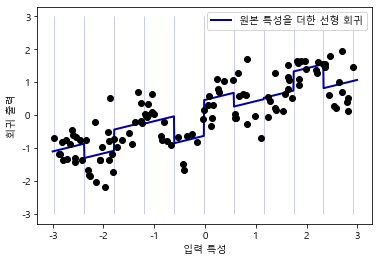

In [48]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = "원본 특성을 더한 선형 회귀")
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0],y, 'o', c='k' )

# 그래프로 출력

In [49]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
print(X_product[:5])

# 구간과 원본 특성을 곱한 값을 추가 = 20개의 특성
# 구간별 기울기, 절편이 다름

(120, 20)
[[ 0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
  -0.    -0.    -0.    -0.753 -0.    -0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     2.704]
 [ 0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     1.392  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.592  0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
  -0.    -2.064 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.   ]]


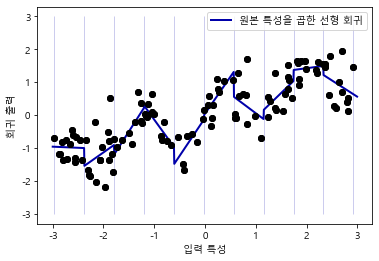

In [51]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = "원본 특성을 곱한 선형 회귀")
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0],y, 'o', c='k')

# 그래프로 출력

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

# 다항식 추가
# degree는 차원 = 여기서는 10차원

score: 0.73


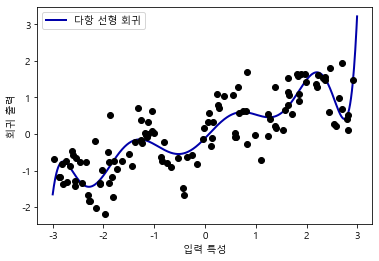

In [58]:
lreg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, lreg.predict(line_poly), label="다항 선형 회귀")
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0],y, 'o', c='k')

print("score: {:.2f}".format(lreg.score(X_poly, y)))

# 선형회귀는 곡선형태로 나타남
# 1차원 데이터에 대해서도 곡선 회귀가 나타남
# 시작과 끝에 급격하게 상승하거나 하락함
# 스코어가 0.73이 됨

Gamma =  1
score: 0.75
Gamma =  10
score: 0.79


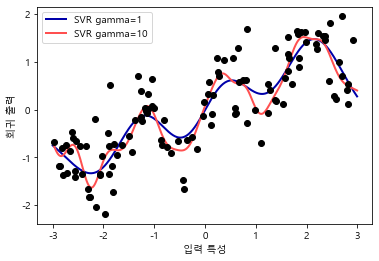

In [61]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line), label='SVR gamma={}'.format(gamma))
    print("Gamma = ", gamma)
    print("score: {:.2f}".format(svr.score(X, y)))

plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0],y, 'o', c='k')

# 원본 데이터에 SVR을 적용 - 감마가 1, 10임
# 감마는 커널 폭의 역수로 작으면 넓은 커널영역, 많은 포인트를 고려
# 크면 각 포인트에 민감해서 복잡한 모델이 만들어져서 스코어가 높음
# 하지만 과다적합일 수 있으므로 주의해야 함

In [63]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(X_train.shape, X_train_poly.shape)

# 2차원만 적용했는데 13개에서 105개로 변경이 됨
# 즉, 각각의 원소들을 서로 곱함 = 이러면 105개가 됨

(379, 13) (379, 105)


In [65]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

# 상호작용이 있을 때 점수가 높아짐 - 성능 향상

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

# 상호작용이 없을 때 더 높음
# 이것은 랜덤포레스트 모델이 정교해서 상호작용 특성이 있으면 더 낮아짐
# ridge는 모델이 정교하지 않아서 더 높아진 것임

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


In [67]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

# 정수 카운트
# 로그나 지수로 하면 도움이 됨
# 정수특성/실수 응답
# normal 함수로 특성 3개짜리1000개의 샘플을 생성
# 다시 normal 분포로 다시 사이즈 3개로 weight를 생성
# 오리지널을 지수로 바꾸고 식을 곱해서 포아송 분포로 만듦
# 그 다음 타겟 y를 생성

In [69]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

# 특성 출현 횟수 출력
# 2번이 68로 높음
# 뒷부분은 0, 1로 작음 - 작은 값이 많음

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [71]:
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

# 비선형 관계이므로 R제곱 값이 나옴

테스트 점수: 0.627


In [73]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

# 로그 변환
# 0값은 log적용이 안되므로 +1을 함
# 테스트 점수가 강의보다 좀 낮게 나옴
# 이것은 알고리즘이 변경이 되서 이 데이터에서 점수가 낮아진 것으로 생각이 됨
# 하지만 위의 R제곱 값보다 큼

테스트 점수: 0.671


X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


([<matplotlib.axis.YTick at 0x21c3884d400>], [Text(0, 0, '')])

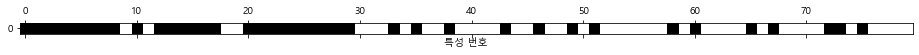

In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

mask = select.get_support() # 선택된 특성을 boolen 값
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

# SelectPercentile
# cancer 데이터에 50개의 노이즈를 추가 = 총 80개의 특징
# SelectPercentile를 이용하여 50%의 특성을 선택
# 80개에서 40개로 줄어든 것을 볼 수 있음

In [83]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

# 에러가 계속 발생해 max_iter를 엄청 높게 해서 실행
# 강의 내용과 다르게 전체특성에서 점수가 높음
# 알고리즘이 달라져서 변경된 것으로 생각이 됨

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.937


X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x21c380194f0>], [Text(0, 0, '')])

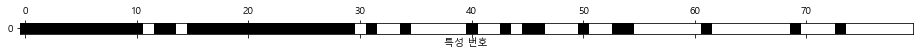

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

# 트리 100개로 특징 선택
# 일변량 분석보다 강력, 복잡한 모델

In [95]:
score = LogisticRegression(max_iter=5000).fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score selected: {:.3f}".format(score))

# 오류가 발생해서 max_iter를 증가시켜서 실행
# selected 점수가 낮게 나오는데, 이것도 알고리즘의 변화가 생겨서 점수가 더 낮아진 것으로 생각을 함

Test score: 0.951
Test score selected: 0.354


([<matplotlib.axis.YTick at 0x21c39dbd850>], [Text(0, 0, '')])

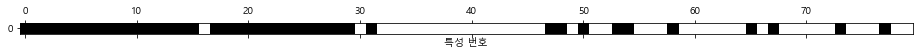

In [96]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

# 원본 특성중 1개 누락, 40번 수행

In [99]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

# 오류가 발생해 max_iter를 증가시켜서 실행
# 아래는 랜덤포레스트와 같이 성능이 향상이 됨

테스트 점수: 0.940
테스트 점수: 0.951


시티 바이크 데이터:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

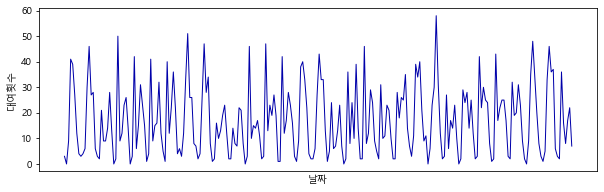

In [100]:
citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터:\n{}".format(citibike.head()))

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks.astype(int), xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

# 전문가 지식 활용
# 248개의 샘플 = 3시간 단위로 나눠서 누적한 수

In [101]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

# 타깃 값 추출
# 날짜와 시간을 하나의 숫자로 표현
# 훈련은 184(23일), 테스트는 64(8일) 사용

In [102]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


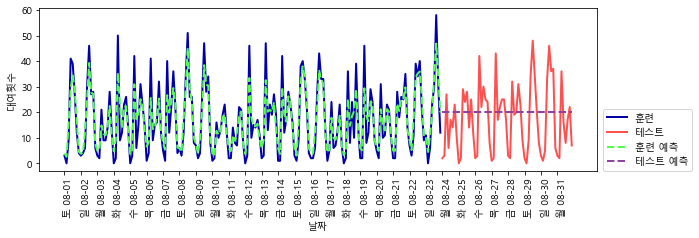

In [103]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

# 랜덤포레스트로 실행
# 테스트데이터의 예측이 점선 1개임
# 이것은 거의 예측을 하지 못함
# 테스트 데이터의 특성 값이 훈련데이터와 겹치지 않아서 예측이 불가능함

테스트 세트 R^2: 0.60


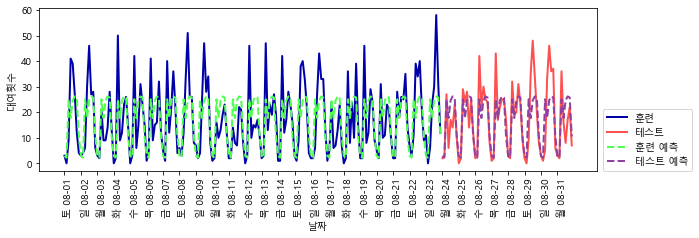

In [105]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

# 시간으로 회귀 예측
# 그래프는 그대로지만 특성을 같게 바꿨음
# 이번엔 점수가 마이너스가 아닌 0.6이 됨

테스트 세트 R^2: 0.84


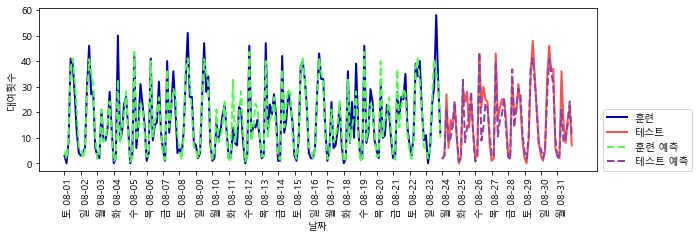

In [106]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

# 시간 요일 특성으로 예측
# 굉장히 개선이 잘됨
# 점수도 높아짐
# 24일, 31일 예측이 동일함

테스트 세트 R^2: 0.13


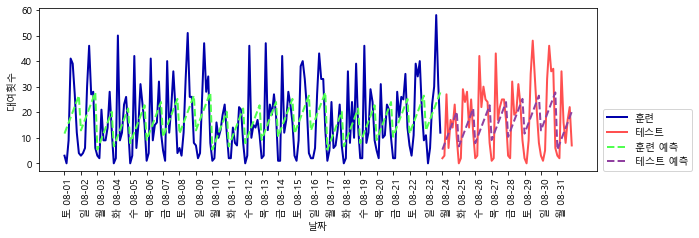

In [107]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

# 이번엔 선형회귀를 사용
# 점수가 너무 낮아짐
# 요일, 시간이 정수이므로 연속 값으로 해석을 함
# 하루의 시간이 증가할수록 대여수가 증가하는 선형 증가로 학습을 함
# 그래서 너무 낮아짐

테스트 세트 R^2: 0.62


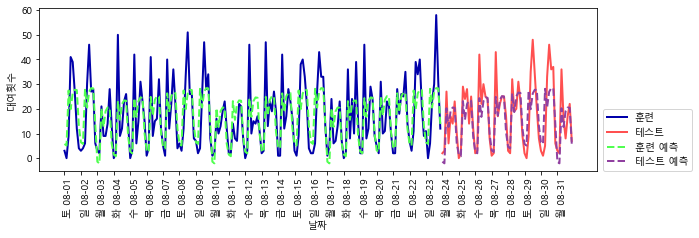

In [108]:
enc = OneHotEncoder()

X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

# 그래서 원핫인코더를 사용해서 7개의 요일, 8개의 시간구간으로 15개의 특성으로 만듦
# 요일마다 시간마다 하나의 계수를 학습
# 시간패턴이 모든 날에 공유
# 점수가 높아짐
# 앞의 점수인 0.84보다는 낮지만 그래도 개선이 된 것을 볼 수 있음

테스트 세트 R^2: 0.85


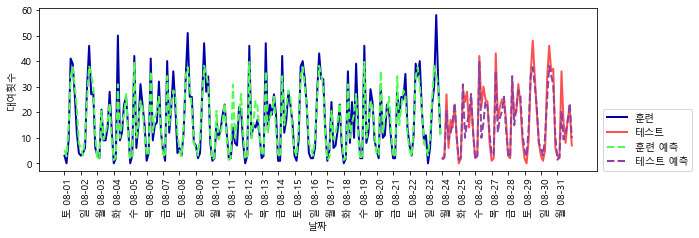

In [109]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

# 상호작용특징
# 15개의 2개의 차원이므로 120개가 생성됨
# ridge가 0.85로 제일 높게 나옴
#

Text(0, 0.5, '계수 크기')

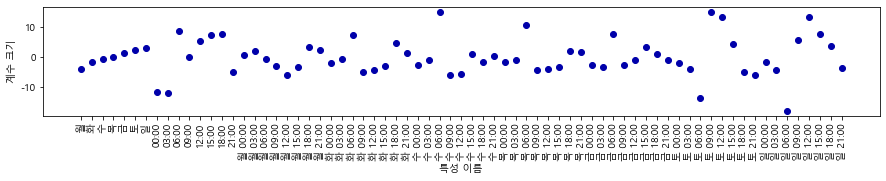

In [110]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour
features_poly = poly_transformer.get_feature_names(features)

features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

# ridge codf 구하기
# 성능이 개선된 것을 볼 수 있음(위쪽에 있는 것들이 있으므로)

In [111]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

# 훈련데이터 생성 및 분할
# 로지스틱 회귀 모델로 훈련 및 평가
# 0.88로 높게 나옴

테스트 세트 점수: 0.88


In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression 

iris = load_iris() 
logreg = LogisticRegression(max_iter=5000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=3) 
print("교차 검증 점수: {}". format(scores))

scores = cross_val_score(logreg, iris.data, iris.target, cv=5) 
print("교차 검증 점수: {}". format(scores))

scores = cross_val_score(logreg, iris.data, iris.target, cv=10) 
print("교차 검증 점수: {}". format(scores))

# 정확도가 큰 차이를 보임
# 모델이 각 폴드에 의존적

교차 검증 점수: [0.98 0.96 0.98]
교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]
교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [118]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

# 셔플을 안한 것과 한 것을 비교
# 셔플을 해야 정확하게 나옴

교차 검증 점수:
[0. 0. 0.]
교차 검증 점수:
[0.98 0.96 0.96]


In [122]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

# LOOCV
# 테스트 샘플 수가 1인 k겹 교차 검증 - k는 샘플 수
# 데이터 셋이 클때는 시간이 오래걸림
# 작은 데이터 셋에서는 공정한 결과가 나옴

교차 검증 분할 횟수:  150
평균 정확도: 0.97


In [123]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print("교차 검증 점수:\n{}".format(scores))

# 임의 분할 교차 검증
# 전체 데이터중 훈련과 테스트 데이터의 사이즈를 정해주면 이를 n번 반복
# 사이즈를 정해주므로 훈련데이터와 테스트 데이터를 더해도 100%가 안될 수도 있음
# 즉, 미선택 세트가 있을 수 있음
# 대용량 데이터 작업시 유용

# StratifiedShuffleSplit는 클래스에서 일정한 비율만큼 뽑아옴
# 각 클래스에서 동일하게 뽑아오는 것은 이것이 공정함

교차 검증 점수:
[0.947 0.987 0.96  0.973 0.987 0.947 0.96  0.987 0.96  0.907]


In [124]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

# 그룹별 교차 검증
# 데이터 내에 연관된 그룹이 있을 경우
# 타깃에 따라 폴드를 나누지 않고 입력 특성에 따라 폴드를 나누어야 할 경우
# 100장의 사진으로 사람의 표정을 분류
# 열에 사람이 있으면 세로로 나누면 훈련에 다른사람, 테스트에 다른 사람이 되므로 하면 안됨
# 그룹별로 테스트를 함 - cv에서 GroupKFold사용

# 에러가 발생을 했지만 왜 발생을 했는지 이해를 하지 못했음
# 아마 버전이 문제인 것 같다고 생각을 했음

교차 검증 점수:
[0.75  0.6   0.667]


C:\Users\white\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [125]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: {}".format(best_parameters))

# Grid Search
# 파라미터 조합을 만들어서 실행 = 매개변수 튜닝으로 모델 성능 향상
# 매개변수의 조합을 시도해서 성능이 가장 높은 조합을 찾음
# for문으로 생성 가능

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


In [126]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

# Validation set
# 테스트데이터를 떼어 놓고 다시 훈련과 검증을 다시 분할
# 즉, 훈련에서 다시 훈련과 검증으로 다시 분할
# 검증값에서 최종 값은 0.96이지만 테스트 점수가 0.92임

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


In [128]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

# 교차검증을 사용한 그리드 서치
# 강의와 값이 다르지만 알고리즘이 달라져서 이렇게 되었다고 생각이 됨

검증 세트에서 최고 점수: 0.97
최적 파라미터:  {'C': 10, 'gamma': 0.1}
최적 파라미터에서 테스트 세트 점수: 0.97


In [129]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n{}".format(param_grid))

# GridSearchCV
# 파라미터들을 먼저 정의

매개변수 그리드:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

grid_search.fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))
print("최고 성능 모델:\n {}".format(grid_search.best_estimator_))

# GridSearchCV
# for문이 아니라 gridSearchCV로 바로 실행
# 테스트 점수, 최적 매개변수, 최고 교차 검증 점수, 최고 성능 모델을 출력할 수 있음

테스트 세트 점수: 0.97
최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
최고 성능 모델:
 SVC(C=10, gamma=0.1)


In [133]:
import pandas as pd

pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)

display(np.transpose(results.head()))

# 교차 검증 결과 분석
# 매개변수가 모델의 일반화에 미치는 영향 파악
# 간격을 넓게 하여 적은 수로 그리드 서치 시작
# 결과를 분석해 검색 영역 조정
# cv_results_는 그리드 서치 결과 딕셔너리로 이것을 사용

,0,1,2,3,4
mean_fit_time,0.0018,0.0016,0.0012,0.0016,0.001
std_fit_time,0.0004,0.00048,0.00041,0.00049,1.2e-06
mean_score_time,0.0006,0.00061,0.0008,0.0004,0.00039
std_score_time,0.00049,0.0005,0.0004,0.00049,0.00048
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


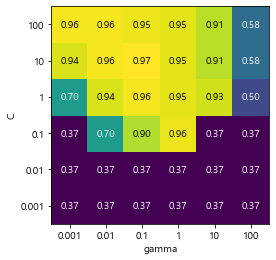

In [134]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# 교차 검증 평균 점수 히트맵 그래프
# 교차 검증의 정확도가 높으면 밝은 색, 낮으면 어두운 색
# 매개변수에 따라 40%~90%

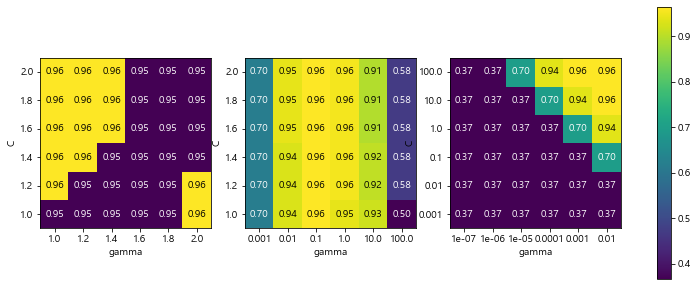

In [135]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

# 교차 검증 평균 점수의 히트맵 그래프
# linear는 변화가 거의 없음 - 스케일이 잘못 설정이 되었음
# one_log는 세로띠 형식으로 gamma는 잘 되었지만 C가 영향이 없음
# C가 설정이 잘못되었거나 중요하지 않음
# range는 왼쪽 아래 영역이 변화가 없고, 경계 조정이 필요함
# 테스트 데이터를 대상으로 파라미터를 조정하면 안됨
# linear가 다르게 출력이 되는데, 잘 보면 0.01차이로 차이가 얼마 없음
# 알고리즘이 달라져서 0.01의 차이가 생긴 것으로 생각이 됨

In [136]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}] 

print("그리드 목록:\n {}". format(param_grid))

# 비대칭 매개변수 그리드 탐색
# 커널을 포함한 그리드 딕셔너리 리스트를 먼저 생성

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [138]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

# 최적 파라미터와 최고 검증 점수와 테스트 점수를 출력
# 최고 검증 점수와 테스트 점수가 같지만 이것은 우연히 같은 값이 나온 것임

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97
테스트 세트 점수: 0.97


In [139]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)

print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())
print(param_grid)

# 중첩 교차 검증
# 원래는 훈련과 테스트로 나눠서 했음
# 아니면 훈련과 테스트를 나누고, 훈련에서 cross-val, grid-search를 했었음
# 중첩교차검증은 일반화 성능이 좋은지 판별할 때 사용

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [140]:
for training_samples, test_samples in outer_cv.split(X, y):
    best_parms = {}
    best_score = -np.inf
    for parameters in parameter_grid:
        cv_scores = []
        for inner_train, inner_test in inner_cv.split( X[training_samples], y[training_samples]): 
            clf = Classifier(**parameters)
            clf.fit(X[inner_train], y[inner_train])
            score = clf.score(X[inner_test], y[inner_test])
            cv_scores.append(score)
        mean_score = np.mean(cv_scores)
        if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
    clf = Classifier(**best_params)
    clf.fit(X[training_samples], y[training_samples])
    outer_scores.append(clf.score(X[test_samples], y[test_samples]))

NameError: name 'outer_cv' is not defined

In [141]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

# 중첩 교차 검증(nested CV)

In [142]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))

print("교차 검증 점수: {}".format(scores))

# 전체 데이터 5겹, grid search 변수 C, gamma 각 6, cv=5
# 모델 수 = 5 * 36 * 5 = 900번 반복

교차 검증 점수: [0.967 1.    0.967 0.967 1.   ]


In [143]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

# 불균형 데이터
# 한 클래스가 다른 클래스보다 포함 샘플 수가 월등히 많을 경우
# 9만 true, 나머지는 false

In [144]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

# 불균형 데이터 - DummyClassifier
# 빈도가 많은 것으로 예측을 함
# 90퍼의 정확도 

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [145]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

# 불균형 데이터 - DecisionTreeClassifier
# 0.92가 나옴

테스트 점수: 0.92


In [148]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

# 불균형 데이터 - 더미
# 훈련세트와 같은 비율을 예측
# 점수가 잘 나왔음
# 경고가 발생을 하는데 왜 발생하는지 이유를 모르겠음

dummy 점수: 0.80


C:\Users\white\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [149]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, max_iter=5000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

# 불균형데이터 - 로지스틱회귀
# 0.98로 매우 높음
# 오류가 발생해서 max_iter을 증가시켜서 실행시킴

logreg 점수: 0.98


In [150]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

# 오차행렬
# 4개로 나눠서 보여줌
# 음성, 양성, 음성예측, 양성예측으로 나뉨

오차 행렬:
[[402   1]
 [  6  41]]


In [151]:
print(confusion_matrix(y_test, pred_most_frequent))

print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))

print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))

print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

# 빈도 기반은 0.90 - 동일한 클래스 예측
# 무작위 더미 모델은 0.83 - TP보다 FP가 많음
# 결정트리는 0.92
# 로지스틱회귀는 0.98
# 결정트리/로지스틱회귀는 FP/FN이 작음
# 로지스틱 회귀가 좋은 성능임
# 위와 같이 점수가 나왔었고, 그것을 4부분으로 나눠보면 아래 출력과 같음

[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[360  43]
 [ 42   5]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


In [152]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

# F-score
# 정밀도와 재현율을 함께 고려
# 모든 방법에 대해서 f1 score을 출력
# 빈도 기반 더미는 양성클래스가 0이어서 0
# 무작위 더미는 양성예측이 적어서 적게 나옴
# 트리 모델은 0.55
# 로지스틱은 0.89로 높음 - f1도 높음

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.11
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["9 아님", "9"]))

# Classification report
# 각 클래스가 양성일 경우의 정밀도, 재현율, f1-score
# 오류가 발생을 했는데 왜 발생했는지 해결을 하지 못했음

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\white\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
print(classification_report(y_test, pred_dummy, target_names=["9 아님", "9"]))

# 더미의 경우일 때 Classification report

              precision    recall  f1-score   support

        9 아님       0.90      0.89      0.89       403
           9       0.10      0.11      0.11        47

    accuracy                           0.81       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.81      0.81       450



In [155]:
print(classification_report(y_test, pred_logreg, target_names=["9 아님", "9"]))

# 로지스틱회귀일 때 Classification report

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
# ROC/AUC
# RF vs SVC
# SVM
# 위 세개는 그래프를 그리지 못했음
# SVC를 생성하는 과정에서 make_blobs부분에서 에러가 발생을 했음
# X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
# 위의 문장이 에러가 발생함
# 따라서 svc를 이용하여 만드는 위의 세 그래프를 그리지 못했음

In [178]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)

print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

# 다중 분류 평가지표를 만들기 위해 오차행렬을 생성

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


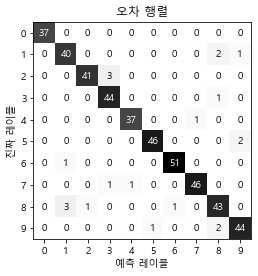

In [179]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='예측 레이블', ylabel='진짜 레이블', xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("오차 행렬")
plt.gca().invert_yaxis()

# 다중 분류 평가지표
# 2을 3으로 3개 잘못 분류했음
# 8을 1로 3개 잘못 분류
# 0, 7은정밀도 1 - 세로가 0
# 0, 4, 6은 재현률 1 - 가로가 0

In [180]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

# Classification report
# micro와 macro 평균 f1점수를 출력
# macro는 가중치 없이 평균
# micro는 모든 클래스의 FP, FN, TP를 합하여 f1 점수 계산 - 각 샘플을 동일한 비중으로 고려

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


In [181]:
print("기본 평가 지표: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))

explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("정확도 지표: {}".format(explicit_accuracy))

roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC 지표: {}".format(roc_auc))

# 기본 평가 지표와 정확도 지표 AUC 지표를 출력

기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
AUC 지표: [0.997 0.999 1.    1.    0.984]


In [182]:
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state = 0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 매개변수:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)) : {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

# Gridsearch
# 최적의 매개변수, 최상의 교차 검증 점수, 테스트 세트 AUC, 테스트 세트 정확도를 출력

정확도 지표를 사용한 그리드 서치
최적의 매개변수: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)) : 0.976
테스트 세트 AUC: 0.992
테스트 세트 정확도: 0.973


In [183]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("AUC 지표를 사용한 그리드 서치")
print("최적의 매개변수:", grid.best_params_)
print("최상의 교차 검증 점수 (AUC)) : {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

# AUC 지표 - scoring="roc_auc"
# 최적의 매개변수, 최상의 교차 검증 점수, 테스트 세트 AUC, 테스트 세트 정확도를 출력

AUC 지표를 사용한 그리드 서치
최적의 매개변수: {'gamma': 0.01}
최상의 교차 검증 점수 (AUC)) : 0.998
테스트 세트 AUC: 1.000
테스트 세트 정확도: 1.000
